In [1]:
using Distributions
using LinearAlgebra
using Plots
using DataFrames
using CSV
include("../experiments/cartpole.jl")
;

load done: 15.454


In [2]:
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole")

"/home/antonxue/stuff/nn-sdp/notebooks/../dump/cartpole"

In [3]:
function loadDataFrame(β, dim)
    suffix = if (β == 0); "deepsdp__dual.csv" else "chordal__double_decomp.csv" end
    filepath = joinpath(DUMP_DIR, "cartpole_beta$(β)_dim$(dim)_" * suffix)
    return CSV.File(filepath)
end

function loadBounds(β)
    csv1 = loadDataFrame(β, 1)
    csv2 = loadDataFrame(β, 2)
    csv3 = loadDataFrame(β, 3)
    csv4 = loadDataFrame(β, 4)
    
    x1_lbs, x1_ubs = -1*csv1.neg_val, csv1.pos_val
    x2_lbs, x2_ubs = -1*csv2.neg_val, csv2.pos_val
    x3_lbs, x3_ubs = -1*csv3.neg_val, csv3.pos_val
    x4_lbs, x4_ubs = -1*csv4.neg_val, csv4.pos_val
    @assert length(x1_lbs) == length(x1_ubs) == length(x2_lbs) == length(x2_ubs)
    @assert length(x3_lbs) == length(x3_ubs) == length(x4_lbs) == length(x4_ubs)
    @assert length(x2_lbs) == length(x3_lbs)
    
    x_lbs = [[x1_lbs[t]; x2_lbs[t]; x3_lbs[t]; x4_lbs[t]] for t in 1:length(ts)]
    x_ubs = [[x1_ubs[t]; x2_ubs[t]; x3_ubs[t]; x4_ubs[t]] for t in 1:length(ts)]
    return x_lbs, x_ubs
end

β0_lbs, β0_ubs = loadBounds(0)
β1_lbs, β1_ubs = loadBounds(1)
β2_lbs, β2_ubs = loadBounds(2)
β3_lbs, β3_ubs = loadBounds(3)
β4_lbs, β4_ubs = loadBounds(4)

ts = 1:8

β0_a_minmaxs = [(β0_lbs[t][1:2], β0_ubs[t][1:2]) for t in ts]
β0_b_minmaxs = [(β0_lbs[t][3:4], β0_ubs[t][3:4]) for t in ts]

β1_a_minmaxs = [(β1_lbs[t][1:2], β1_ubs[t][1:2]) for t in ts]
β1_b_minmaxs = [(β1_lbs[t][3:4], β1_ubs[t][3:4]) for t in ts]

β2_a_minmaxs = [(β2_lbs[t][1:2], β2_ubs[t][1:2]) for t in ts]
β2_b_minmaxs = [(β2_lbs[t][3:4], β2_ubs[t][3:4]) for t in ts]

β3_a_minmaxs = [(β3_lbs[t][1:2], β3_ubs[t][1:2]) for t in ts]
β3_b_minmaxs = [(β3_lbs[t][3:4], β3_ubs[t][3:4]) for t in ts]

β4_a_minmaxs = [(β4_lbs[t][1:2], β4_ubs[t][1:2]) for t in ts]
β4_b_minmaxs = [(β4_lbs[t][3:4], β4_ubs[t][3:4]) for t in ts]
;

In [4]:
function plotBox2D!(plt, xmin, xmax; kwargs...)
    @assert length(xmin) == length(xmax) == 2
    x1min, x1max = xmin[1], xmax[1]
    x2min, x2max = xmin[2], xmax[2]
    verts = Vector{VecReal}()
    
    push!(verts, [x1min; x2min])
    push!(verts, [x1min; x2max])
    push!(verts, [x1max; x2max])
    push!(verts, [x1max; x2min])
    push!(verts, verts[1])
    
    plt = Utils.plotSeqPoints!(plt, verts; kwargs...)
    return plt
end

function plotTrajBoxes!(plt, β, mode=:a; kwargs...)
    if β == 0; lbs, ubs = β0_lbs, β0_ubs
    elseif β == 1; lbs, ubs = β1_lbs, β1_ubs
    elseif β == 2; lbs, ubs = β2_lbs, β2_ubs
    elseif β == 3; lbs, ubs = β3_lbs, β3_ubs
    elseif β == 4; lbs, ubs = β4_lbs, β4_ubs
    else error("unsupported β: $(β)")
    end
    
    @assert length(lbs) == length(ubs)
    
    if mode == :a; min_maxes = [(lbs[t][1:2], ubs[t][1:2]) for t in 1:8]
    elseif mode == :b; min_maxes = [(lbs[t][3:4], ubs[t][3:4]) for t in 1:8]
    else error("unsupported mode: $(mode)")
    end
    
    my_plt = plt
    for (xmin, xmax) in min_maxes
        my_plt = plotBox2D!(my_plt, xmin, xmax; kwargs...)
    end
    return my_plt
end

plotTrajBoxes! (generic function with 2 methods)

In [27]:
# trajs = randomCartpoleTrajs(x1min, x1max, 8)
trajs = randomNeuralCartpoleTrajs(x1min, x1max, 8)
;

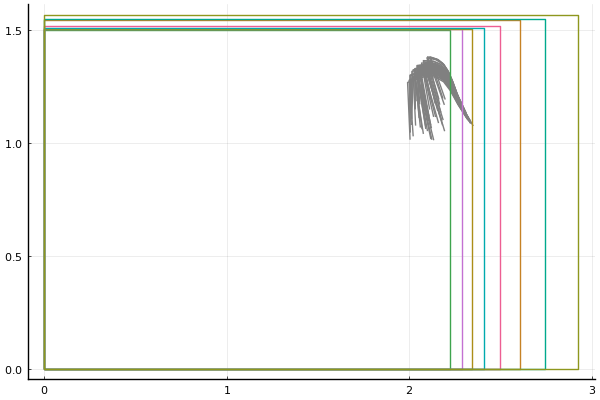

In [29]:
plt = plot()
for n in 1:50
   Utils.plotSeqPoints!(plt, [t[1:2] for t in trajs[n]], color=:gray)
end
plt = plot!(plt, legend=false)
plotTrajBoxes!(plt, 0, :a)

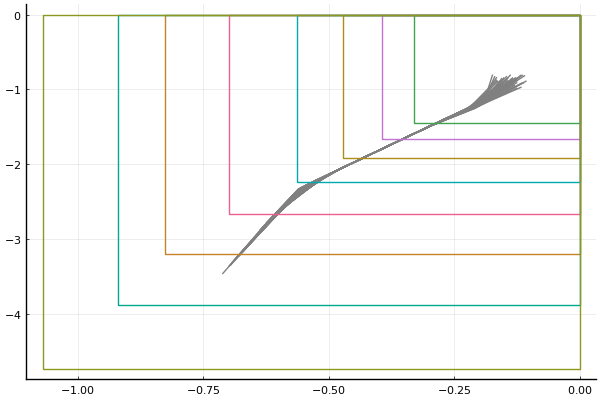

In [33]:
plt = plot()
for n in 1:50
   Utils.plotSeqPoints!(plt, [t[3:4] for t in trajs[n]], color=:gray)
end
plt = plot!(plt, legend=false)
plotTrajBoxes!(plt, 4, :b)

In [23]:
β0_a_minmaxs

8-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([3.21703145119759e-11, 7.08848296982675e-10], [2.224280900460863, 1.501691452029816])
 ([2.232937584577102e-9, 4.158371367153714e-8], [2.2889094051556422, 1.506588846461149])
 ([1.0196640937271357e-11, 4.086002954371109e-9], [2.344905136488377, 1.5061652055072667])
 ([4.928799631509348e-15, 1.3747289084180452e-14], [2.408991313053343, 1.509375357644951])
 ([1.3694557449377402e-14, 4.832323493780212e-8], [2.497113239194011, 1.5208733799752034])
 ([2.570741063998004e-12, 7.613411872812584e-10], [2.6058661230630022, 1.5446052670885342])
 ([2.172941412036983e-14, 4.1023340354367164e-13], [2.744428209670958, 1.5511742222757257])
 ([3.2406600496384223e-9, 9.228664898885594e-10], [2.9252062806603054, 1.5694345398379692])

In [24]:
β0_b_minmaxs

8-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([-0.41580054377173714, -1.4714445904376943], [1.3032791932384846e-6, -7.685946637297451e-10])
 ([-0.47772223123198265, -1.6717479029018802], [-5.9155824128560875e-8, -7.113337090829922e-13])
 ([-0.5635402258196993, -1.9287563496911317], [-6.17800579723547e-11, -2.4084349668916572e-9])
 ([-0.6757683764549581, -2.2395163793113246], [-2.2952278623779955e-9, -8.62013458301172e-12])
 ([-0.8389494817703519, -2.6709163803143325], [-6.917623572364747e-8, -2.1835807543873795e-9])
 ([-1.030822696364604, -3.2040929644469403], [-1.0015273426269518e-7, -5.519224563530323e-8])
 ([-1.2274588221651035, -3.8841896915178586], [-1.53794442088837e-12, -5.097296846443326e-8])
 ([-1.4751573074667765, -4.773938406709018], [-1.1204036741936245e-9, -3.311459175346311e-8])